In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

# 시험 환경 세팅

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터셋 불러오기

In [4]:
df = pd.read_csv('./insurance.csv')

In [5]:
df 

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [132]:
# ( 성별은 0이 남자 1은 여자 )

In [6]:
X_data = df.drop(["charges"], axis=1).to_numpy()
Y_data = df["charges"].to_numpy()

In [7]:
X_data.shape

(1338, 5)

In [8]:
Y_data.shape

(1338,)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=100, shuffle=True)

In [10]:
X_train.shape

(1070, 5)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형회귀 모델 훈련
lr.fit(X_train, Y_train)

# 예측
pred = lr.predict(X_test)

In [12]:
print("기울기", lr.coef_)
print("절편", lr.intercept_)

기울기 [2.64799803e+02 1.73446608e+01 2.97514806e+02 4.69339602e+02
 2.34692802e+04]
절편 -11576.999976112367


In [13]:
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))   

0.7368220127747351
0.7938983522335603


In [14]:
from sklearn.preprocessing import  PolynomialFeatures
ss = PolynomialFeatures(degree=5, include_bias=False)
train_scaled = ss.fit_transform(X_train)
test_scaled = ss.fit_transform(X_test)

In [15]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=10, max_iter=1000)
lr.fit(train_scaled, Y_train)

C:\Users\KOREAIT\.conda\envs\py39tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+10, tolerance: 1.538e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [16]:
print(lr.score(train_scaled, Y_train))
print(lr.score(test_scaled, Y_test))

0.8454782082162202
0.8598736434044765


# 예측 모델 평가하기

## 1. 테이블로 출력하기

In [17]:
comparison = pd.DataFrame(
             {'actual':Y_test,
              'pred':pred})
comparison

,actual,pred
0,1826.84300,4765.249466
1,20177.67113,4957.730865
2,7421.19455,8298.988153
3,1877.92940,3078.811868
4,15518.18025,24165.956542
...,...,...
263,1984.45330,5776.764928
264,14283.45940,23102.847340
265,14043.47670,14280.732585
266,8825.08600,10527.417291


## 2. 그래프로 출력하기

<AxesSubplot:xlabel='actual', ylabel='pred'>

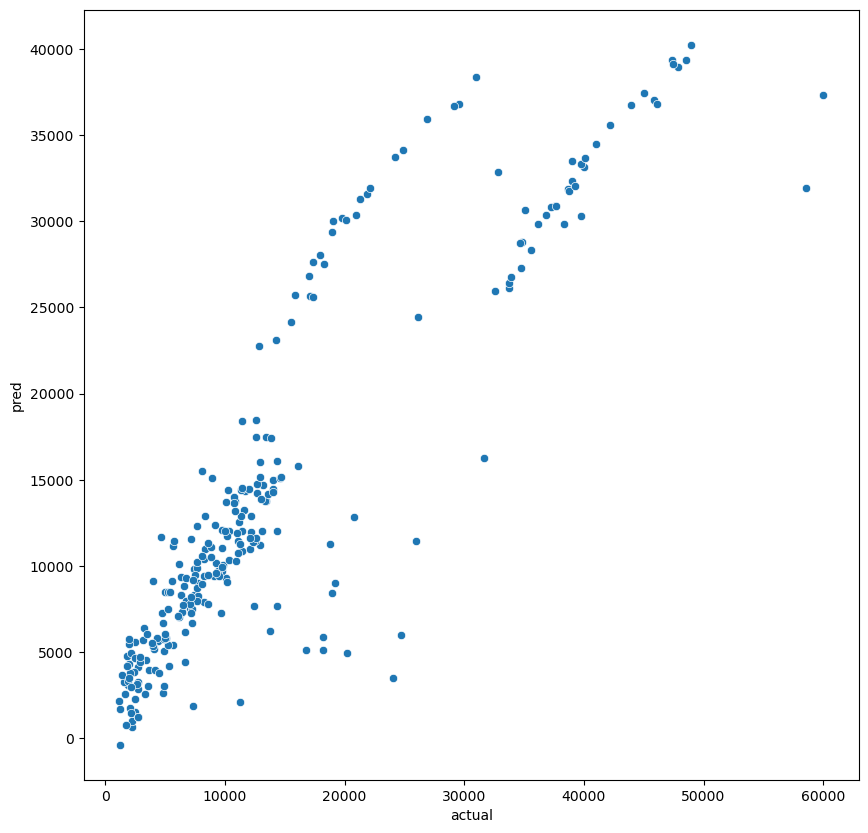

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

# 보험료의 평균은?

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, pred) ** 0.5  # RMSE 계산 실행

5684.927776334485

In [21]:
mean_squared_error(Y_test, pred, squared=False)

5684.927776334485

In [23]:
lr.score(train_scaled, Y_train)

0.8454782082162202

In [24]:
print("기울기", lr.coef_)
print("절편", lr.intercept_)

기울기 [-4.89599784e+01 -0.00000000e+00 -4.06964640e+02  3.50733541e+02
  0.00000000e+00  4.70618254e+00  8.31626500e+00 -2.61955823e+00
  1.65298687e+01  4.13778670e+02  0.00000000e+00  2.20934261e+01
  0.00000000e+00 -0.00000000e+00  6.88656663e+00  2.43516111e+01
  2.06993068e+02  3.87957514e+02  0.00000000e+00  0.00000000e+00
  2.13078610e-02 -4.28827187e-01  1.09916129e-02 -1.45830721e+00
 -2.53003686e+00  1.20568238e-01  1.55770804e+00  2.99997659e+01
 -1.55216247e+01  4.64160305e-04 -7.88175131e-01  4.94610242e+00
 -1.13737746e+01  6.02952299e+01 -1.64698079e+02  0.00000000e+00
 -6.96456358e+01  0.00000000e+00 -0.00000000e+00  1.22927858e+00
 -6.02214667e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  6.44549371e-02  1.47229854e+00  1.10188433e+01
  1.23263943e+01 -2.33736033e+01 -1.66449458e+02 -1.50198084e+02
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.22147577e-06
 -2.54008460e-02  9.15386776e-04  8.24546233e-03 -3.28658647e-02
  9.27439516e-02  4.7